# **CAR SALES**

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import math
import time
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,jaccard_score,log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [101]:
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred,average='micro')
    prec = precision_score(y_true, y_pred,average='micro')
    rec = recall_score(y_true, y_pred,average='micro')
    jacc=jaccard_score(y_true,y_pred,average='micro')
    return {'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec,'Jaccard':jacc}

In [102]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Classification/Car/car_data.csv'
df=pd.read_csv(url,sep=',')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [104]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [105]:
df['Gender'].value_counts()

Gender
Female    516
Male      484
Name: count, dtype: int64

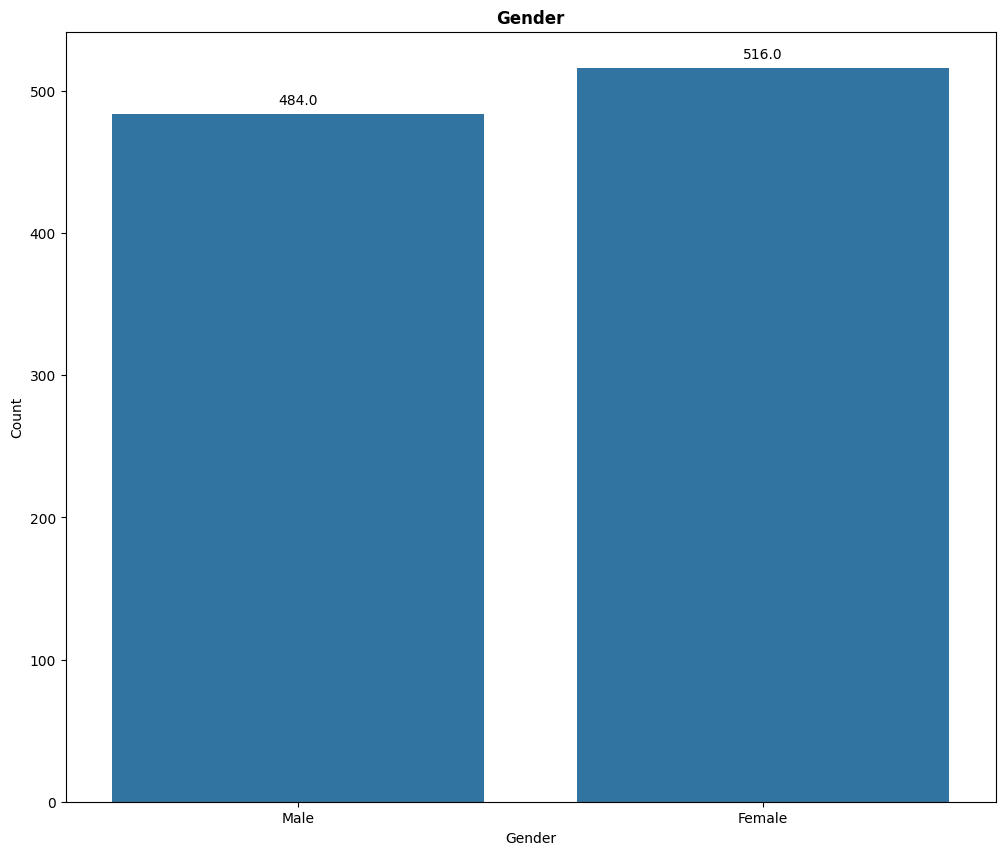

In [106]:
# Crear el gráfico de barras
plt.figure(figsize=(12,10))
ax = sns.countplot(data=df, x='Gender')

# Agregar etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Configuración del título y etiquetas de los ejes
plt.title('Gender', fontsize=12, weight='bold')
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Mostrar el gráfico
plt.show()


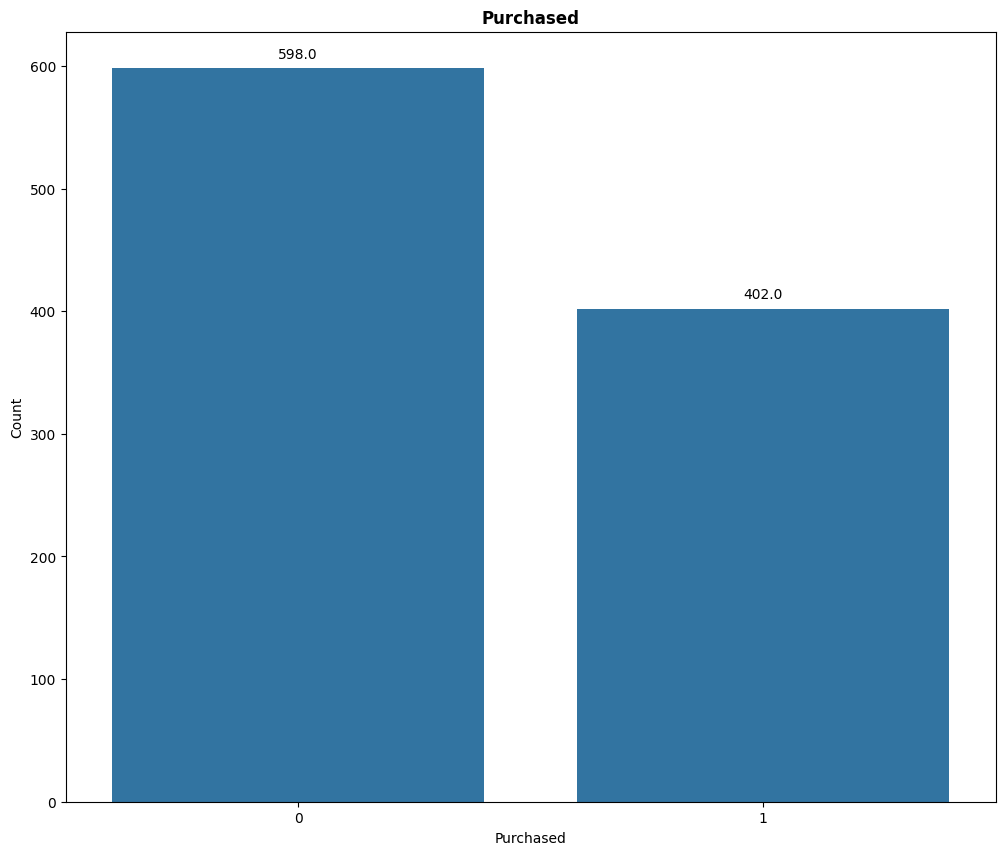

In [107]:
# Crear el gráfico de barras
plt.figure(figsize=(12,10))
ax = sns.countplot(data=df, x='Purchased')

# Agregar etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Configuración del título y etiquetas de los ejes
plt.title('Purchased', fontsize=12, weight='bold')
plt.xlabel('Purchased', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Mostrar el gráfico
plt.show()

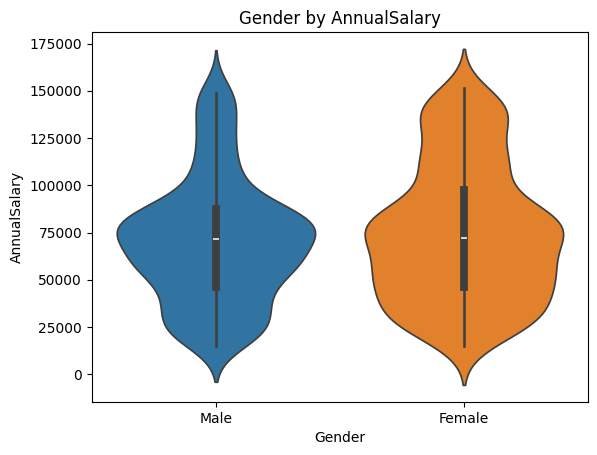

In [108]:
sns.violinplot(data=df,x='Gender',y='AnnualSalary',hue='Gender')
plt.title('Gender by AnnualSalary')
plt.show()

In [109]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [110]:
df.columns
df_salary=df.groupby(['Age','Gender'])['AnnualSalary'].mean().unstack()
df_salary

Gender,Female,Male
Age,,
18,66000.000000,67000.000000
19,49900.000000,58857.142857
20,45500.000000,61437.500000
21,52166.666667,74700.000000
22,46400.000000,65500.000000
23,53357.142857,46250.000000
24,54125.000000,46428.571429
25,52250.000000,57954.545455
26,57333.333333,56923.076923


<Figure size 1400x1000 with 0 Axes>

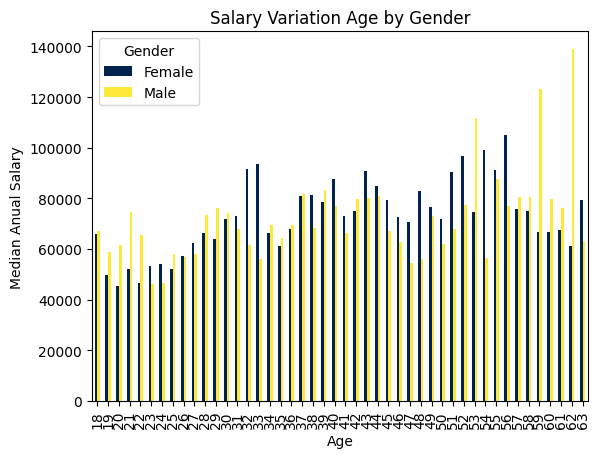

In [111]:
plt.figure(figsize=(14, 10))
df_salary.plot(kind='bar',colormap='cividis')
plt.title('Salary Variation Age by Gender')
plt.xlabel('Age')
plt.ylabel('Median Anual Salary')
plt.show()

In [112]:
for i,j in enumerate(df.columns):
    print(f'Index {i} : {j}')

Index 0 : User ID
Index 1 : Gender
Index 2 : Age
Index 3 : AnnualSalary
Index 4 : Purchased


In [113]:
df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [114]:
feature_columns=df.columns[2:4]
print(feature_columns)
X=df[feature_columns]
X.head()

Index(['Age', 'AnnualSalary'], dtype='object')


,Age,AnnualSalary
0,35,20000
1,40,43500
2,49,74000
3,40,107500
4,25,79000


In [115]:
y=df['Purchased'].values
print(f'Dimension of features : {X.ndim}D')
print(f'Dimension of target : {y.ndim}D')

Dimension of features : 2D
Dimension of target : 1D


## **Spliting Data for Testing**

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [117]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
print(X_train_scaled[:5])
print('-----------------------------')
print(X_test_scaled[:5])

[[-1.33361157  0.32134116]
 [-0.02339669 -0.45583598]
 [-0.67850413 -1.53524866]
 [-0.77209091 -0.38387513]
 [-0.30415702 -0.55658116]]
-----------------------------
[[ 1.34629934  1.93030136]
 [ 0.13676987 -0.13787867]
 [ 0.97413643 -1.27687636]
 [-1.81708543  0.41663337]
 [-1.16580033 -1.21692912]]


In [118]:
# checking shape data of training
print(X_train.shape)
print(y_train.shape)
# checking shape data of testing
print('--------------------------')
print('--------------------------')
print(X_test.shape)
print(y_test.shape)

(800, 2)
(800,)
--------------------------
--------------------------
(200, 2)
(200,)


## **Logistic Classifier**

In [119]:
# parameter grid to search over
from sklearn.model_selection import GridSearchCV
param_grid = {
 'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization strength
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'multi_class': ['ovr', 'multinomial', 'auto'],
 'fit_intercept': [True], # Whether to fit an intercept
 'tol': [0.00001, 0.0001, 0.001, 0.01], # Tolerance for stopping crite
 'max_iter': [100] } #defauult

lc=LogisticRegression()
grid_search=GridSearchCV(lc,param_grid,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'C': 1, 'fit_intercept': True, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}


In [120]:
print(grid_search.best_estimator_)

LogisticRegression(C=1, penalty='l1', solver='liblinear', tol=0.001)


In [121]:
lc=LogisticRegression(C=1,fit_intercept=True,max_iter=100,multi_class='ovr',
                      penalty='l1',solver='liblinear',tol=0.001)
lc.fit(X_train,y_train)

LogisticRegression(C=1, multi_class='ovr', penalty='l1', solver='liblinear',
                   tol=0.001)

In [128]:
y_train_pred=lc.predict(X_train)
y_pred=lc.predict(X_test)
##################################################################
print("Accuracy Score Test:",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("Accuracy Score Train:",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
# Comprobar si hay sobreajuste comparando las precisiones
if accuracy_score(y_train,y_train_pred) > accuracy_score(y_test,y_pred):
    print('El modelo podría estar sobreajustando.')
else:
    print('El modelo parece generalizar bien.')

Accuracy Score Test: 86.0 %
Accuracy Score Train: 81.88 %
El modelo parece generalizar bien.


In [123]:
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.86,
 'F1 Score': 0.8599999999999999,
 'Precision': 0.86,
 'Recall': 0.86,
 'Jaccard': 0.7543859649122807}

In [131]:
calculate_metrics(y_train,y_train_pred)

{'Accuracy': 0.81875,
 'F1 Score': 0.81875,
 'Precision': 0.81875,
 'Recall': 0.81875,
 'Jaccard': 0.6931216931216931}

In [124]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[113,   8],
       [ 20,  59]], dtype=int64)

In [130]:
# Crear la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       121
           1       0.88      0.75      0.81        79

    accuracy                           0.86       200
   macro avg       0.87      0.84      0.85       200
weighted avg       0.86      0.86      0.86       200

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       477
           1       0.81      0.72      0.76       323

    accuracy                           0.82       800
   macro avg       0.82      0.80      0.81       800
weighted avg       0.82      0.82      0.82       800



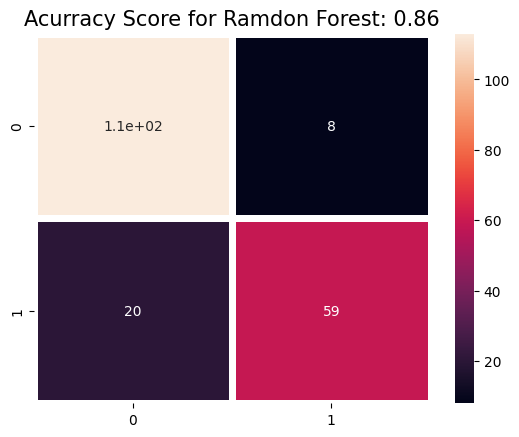

In [126]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Ramdon Forest: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()
  
matrix(lc)

### **ROC CURVE AND AUC**

In [146]:
from sklearn.metrics import roc_curve, auc
y_pred_prob=lc.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_train=lc.predict_proba(X_train_scaled)[:, 1]

#ROC curve train and test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_prob)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_proba_train)

#AUC (Area Under the Curve)
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)

print(f'Roc AUC Test: {roc_auc_test:.4f}')
print(f'Roc AUC Train: {roc_auc_train:.4f}')

Roc AUC Test: 0.9056
Roc AUC Train: 0.8604


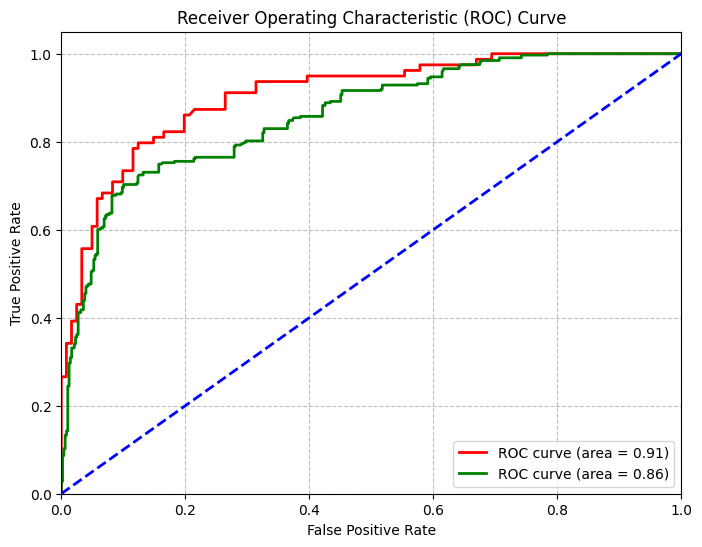

In [147]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot(fpr_train, tpr_train, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

## **Interpretation and Implications**

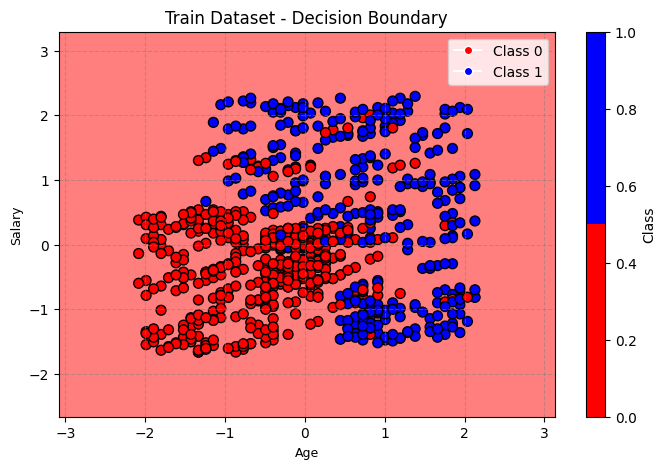

In [151]:
## **Interpretation and Implications**
x_min,x_max=X_train_scaled[:,0].min()-1,X_train_scaled[:,0].max()+1
y_min,y_max=X_train_scaled[:,1].min()-1,X_train_scaled[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
#predict the class for each point in the mesh grid using the best estimator
Z = lc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#custom color map for decision boundaries
cmap_custom = ListedColormap([ 'red','blue'])
#decision boundary and training data
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], cmap=cmap_custom, alpha=0.5)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_custom, marker='o', edgecolors='k', s=50)
plt.ylabel("Salary", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.title("Train Dataset - Decision Boundary")
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.colorbar(label='Class')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=6, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=6, label='Class 1')])
plt.show()

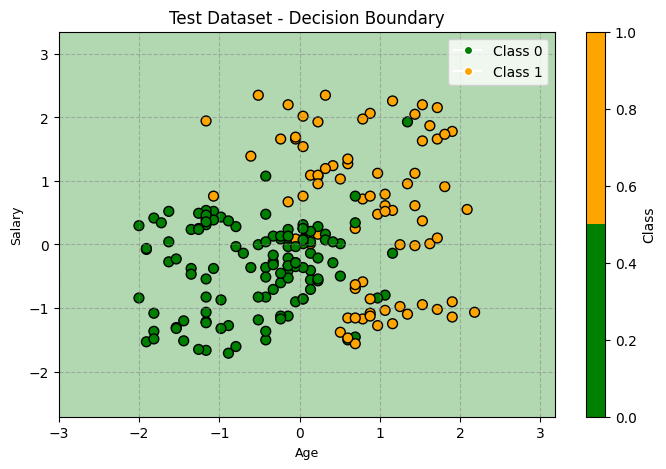

In [153]:
#mesh grid for the decision boundary
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
#predict the class for each point in the mesh grid using the best estimator
Z = lc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#custom color map for decision boundaries
cmap_custom = ListedColormap([ 'green','orange'])
#plot the decision boundary and test data
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, levels=1, cmap=cmap_custom, alpha=0.3)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=cmap_custom, edgecolors='k', s=50)
plt.ylabel("Salary", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.title("Test Dataset - Decision Boundary")
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.colorbar(label='Class')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=6, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=6, label='Class 1')])
plt.show()